In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd

# Simulation of $\alpha$-stable distribution

$\Theta$ and $W$ - independent;

$\Theta$ uniformly distributed on $\left(-\frac{\pi}{2}, \frac{\pi}{2} \right)$; 

$W$ exponentially distributed with mean 1;

In [3]:
n = 1000
mean = 1

Theta = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
U = uniform.rvs(size = n)
W = - mean * np.log(1 - U)

In [37]:
def plot(X, alpha):
    plt.figure(figsize = (4,3))
    plt.hist(X, bins = 15, label = "Generated r.v.")
    plt.title("Generated Stable Random Variables with alpha = %.2f" %alpha)
    plt.show()

In [38]:
def cdf(X, alpha):
    count, bins_count = np.histogram(X, bins = len(X))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    plt.figure(figsize = (4,3))
    plt.title("CDF with alpha = %.2f" %alpha)
    plt.scatter(bins_count[1:], cdf, label = 'CDF', alpha = 0.5)
    plt.show()
    return cdf

## General case

In [27]:
def stable(Theta, W, alpha, beta):
    if alpha == 1:
        Z = 2 / np.pi * ((np.pi / 2 + beta * Theta) * np.tan(Theta) - beta * np.log(np.pi / 2 * W * np.cos(Theta) / (np.pi / 2 + beta * Theta)))
    else:
        Theta_0 = np.arctan(beta * np.tan(np.pi * alpha / 2)) / alpha
        Z = np.sin(alpha * (Theta_0 + Theta)) / (np.cos(alpha * Theta_0) * np.cos(Theta))**(1/alpha) * ((np.cos(alpha * Theta_0 + (alpha - 1) * Theta)) / W)**((1-alpha)/alpha)
    return Z

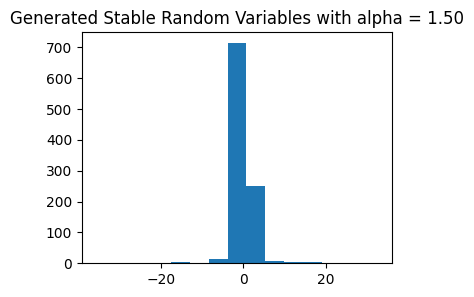

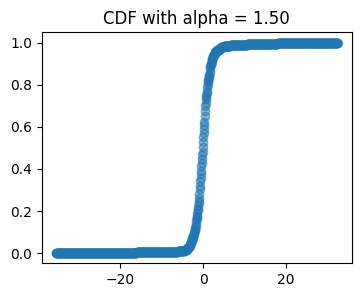

In [39]:
alpha = 1.5
beta = 0

Z = stable(Theta, W, alpha, beta)
plot(Z, alpha)
F = cdf(Z, alpha)

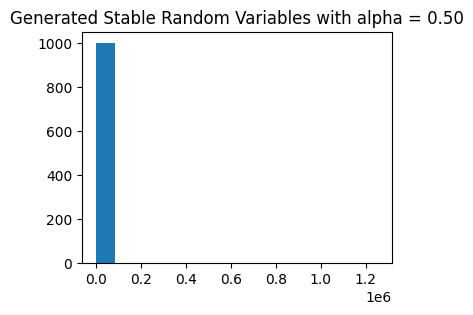

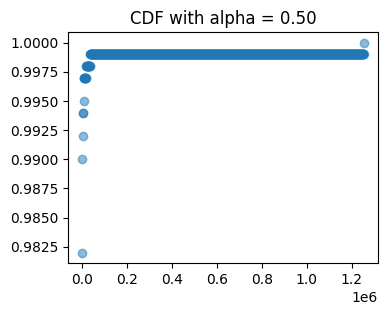

In [46]:
alpha = 0.5
beta = 1

Z = stable(Theta, W, alpha, beta)
plot(Z, alpha)
F = cdf(Z, alpha)

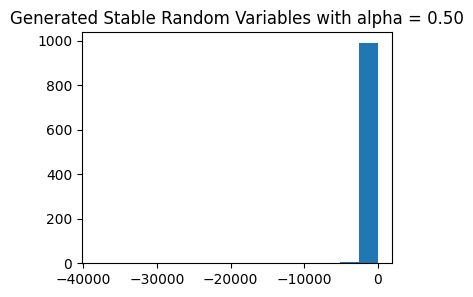

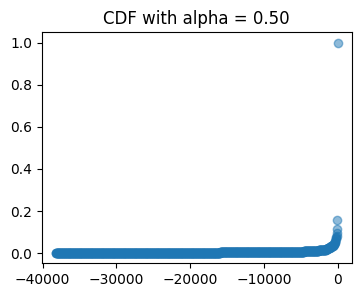

In [47]:
alpha = 0.5
beta = -1

Z = stable(Theta, W, alpha, beta)
plot(Z, alpha)
F = cdf(Z, alpha)

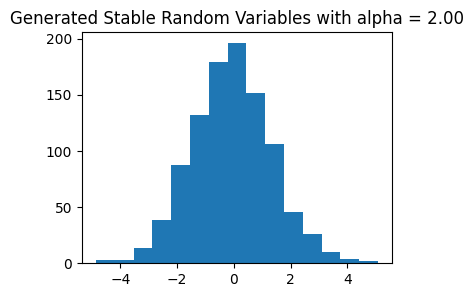

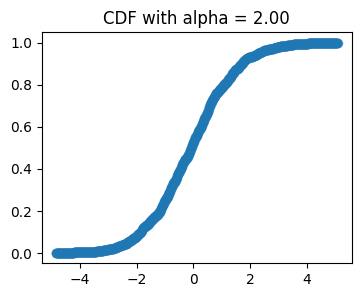

In [40]:
alpha = 2
beta = 0

Z = stable(Theta, W, alpha, beta)
plot(Z, alpha)
F = cdf(Z, alpha)

## Empirical CDF

In [41]:
n = 1000
mean = 1

Theta = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
U = uniform.rvs(size = n)
W = - mean * np.log(1 - U)

In [48]:
alpha = 2
beta = 0
Z = stable(Theta, W, alpha, beta)

In [49]:
test = Z[Z < 0]
print(len(test))
print(test)

534
[-2.13712237e+00 -1.20299847e+00 -7.06616094e-01 -9.13135210e-01
 -1.32903838e+00 -9.12184547e-01 -4.39827582e-02 -1.21261207e+00
 -8.73713711e-01 -2.47810319e+00 -1.75185339e+00 -1.16610713e+00
 -7.43772237e-01 -3.30659798e-01 -6.73497670e-01 -7.66390121e-01
 -9.51425099e-01 -2.45799146e+00 -4.17555425e-01 -3.92701954e-02
 -2.30875903e+00 -3.18428510e+00 -3.39720388e-01 -3.59702290e-01
 -7.95247407e-01 -1.35060263e+00 -2.04853355e+00 -1.52255852e-01
 -9.82507901e-02 -1.51773146e+00 -1.13419955e+00 -3.08077150e+00
 -7.60888202e-01 -8.66819384e-01 -1.00590713e+00 -5.16068175e-01
 -2.86686210e-01 -1.55421345e+00 -2.89777813e+00 -2.78603551e-01
 -9.24664739e-01 -6.34191221e-01 -1.44625943e-02 -5.51661281e-01
 -6.62506340e-01 -1.23804503e+00 -5.55528965e-01 -2.33775845e+00
 -2.97812007e+00 -3.24256876e+00 -3.18481189e+00 -1.62025960e-01
 -4.60420305e-01 -1.42552102e+00 -3.30945695e+00 -2.69988724e-01
 -8.22851305e-01 -1.16828641e+00 -3.03172348e-01 -2.51173648e+00
 -9.69553911e-01 -3.2

$F_Z(x) = P(Z <= x)$

In [51]:
xx = np.linspace(0.01, np.max(Z), n)
ecdf = np.array([np.mean(Z <= x) for x in xx])

In [52]:
ecdf

array([0.537, 0.539, 0.54 , 0.542, 0.542, 0.543, 0.544, 0.546, 0.547,
       0.549, 0.553, 0.553, 0.554, 0.554, 0.556, 0.556, 0.559, 0.559,
       0.56 , 0.562, 0.562, 0.562, 0.564, 0.565, 0.567, 0.567, 0.567,
       0.57 , 0.57 , 0.572, 0.573, 0.575, 0.576, 0.577, 0.578, 0.58 ,
       0.581, 0.583, 0.586, 0.587, 0.59 , 0.591, 0.591, 0.592, 0.592,
       0.594, 0.596, 0.597, 0.599, 0.599, 0.6  , 0.602, 0.604, 0.604,
       0.605, 0.606, 0.608, 0.611, 0.611, 0.612, 0.613, 0.614, 0.616,
       0.62 , 0.62 , 0.62 , 0.62 , 0.622, 0.623, 0.625, 0.627, 0.628,
       0.63 , 0.631, 0.633, 0.634, 0.635, 0.636, 0.637, 0.64 , 0.64 ,
       0.641, 0.641, 0.642, 0.643, 0.644, 0.645, 0.645, 0.648, 0.649,
       0.65 , 0.65 , 0.651, 0.652, 0.653, 0.655, 0.656, 0.657, 0.657,
       0.66 , 0.663, 0.665, 0.666, 0.666, 0.666, 0.671, 0.671, 0.676,
       0.678, 0.679, 0.679, 0.68 , 0.681, 0.682, 0.683, 0.684, 0.686,
       0.689, 0.692, 0.694, 0.695, 0.697, 0.697, 0.697, 0.697, 0.697,
       0.7  , 0.701,

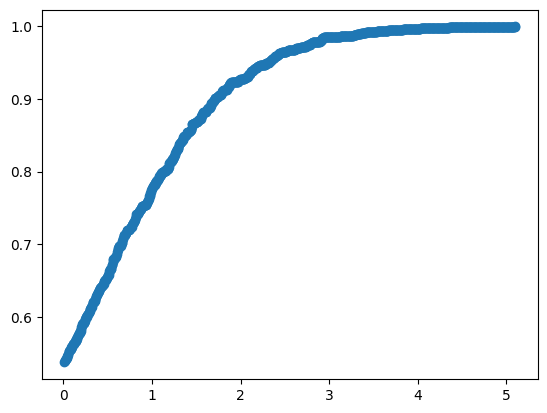

In [56]:
plt.scatter(xx, ecdf)
plt.show()

# Characteristic function

In [64]:
t = 1
phi = np.mean(np.exp(1j * t * Z))
print(phi)
print(phi.real)
print(phi.imag)

(0.3469564479929702-0.034831070207503874j)
0.3469564479929702
-0.034831070207503874


$\varphi(t) = \frac{1}{n} \sum e^{itZ}$

In [62]:
tt = np.linspace(-3, 3, n)
ch = [np.mean(np.exp(1j * t * Z)) for t in tt]
ch

[(-0.02108008838836775+0.018059462096368474j),
 (-0.021087060168505336+0.01812751135130999j),
 (-0.02109101316368278+0.018195282769615947j),
 (-0.021091927858017594+0.018262767334496603j),
 (-0.02108978551049432+0.018329955760440855j),
 (-0.021084568158117937+0.018396838479668994j),
 (-0.02107625861857903+0.018463405628949155j),
 (-0.021064840492428887+0.01852964703679937j),
 (-0.021050298164762785+0.018595552211097113j),
 (-0.021032616806410213+0.01866111032711731j),
 (-0.021011782374630788+0.018726310216019896j),
 (-0.020987781613315108+0.018791140353807134j),
 (-0.02096060205268977+0.018855588850770738j),
 (-0.0209302320085264+0.018919643441448183j),
 (-0.020896660580854067+0.018983291475107j),
 (-0.020859877652175843+0.019046519906775566j),
 (-0.02081987388518912+0.01910931528883821j),
 (-0.020776640720010727+0.019171663763211652j),
 (-0.02073017037090737+0.019233551054119762j),
 (-0.020680455822532286+0.019294962461482414j),
 (-0.020627490825669427+0.01935588285493383j),
 (-0.0205

In [69]:
ch_real = [x.real for x in ch]
ch_imag = [x.imag for x in ch]

Plot of real part

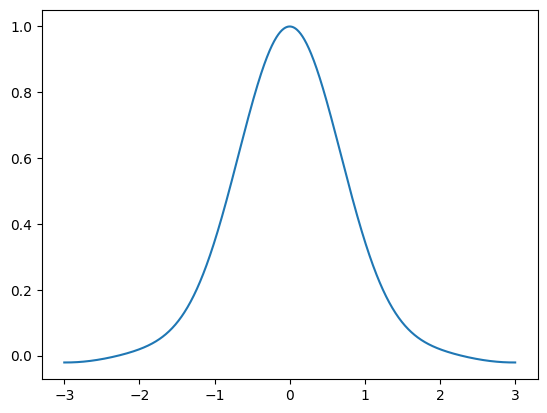

In [74]:
plt.plot(tt, ch_real)
plt.show()

Plot of imaginary part

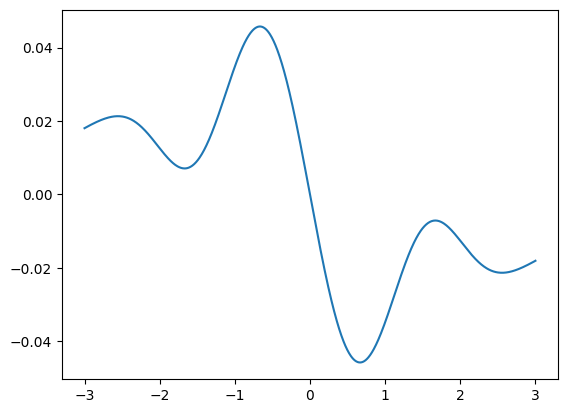

In [75]:
plt.plot(tt, ch_imag)
plt.show()